In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy.stats import gaussian_kde
# from tqdm import tqdm

In [4]:
# SpecTE星表
catalog_path = r"../1_Merge_full_snrg_catalog/SpecTE_test_set_catalog.csv"
catalog=pd.read_csv(catalog_path)
catalog

,snrg,Teff[K],Teff[K]_predict,Teff[K]_err,Logg,Logg_predict,Logg_err,RV,RV_predict,RV_err,...,AlH_err,MnH,MnH_predict,MnH_err,NaH,NaH_predict,NaH_err,VH,VH_predict,VH_err
0,22.61,5286.807617,5392.951697,62.905295,4.492030,4.493928,0.026375,-6.395290,4.341349,4.768853,...,0.074022,-0.011647,0.013536,0.066446,-0.512176,-0.131302,0.366753,0.096581,-0.042744,0.197456
1,17.24,5276.976562,5193.738810,66.382495,4.550466,4.515484,0.024583,-29.734043,-34.809513,5.667194,...,0.080306,-0.150717,-0.271195,0.085806,-0.591786,-0.438280,0.536173,-0.390669,-0.268465,0.255656
2,14.02,4816.598633,4850.350719,47.724656,3.165194,3.052174,0.145651,45.333836,51.528897,4.953377,...,0.076470,-0.314148,-0.355878,0.078453,-0.190688,-0.287114,0.200244,-0.226898,-0.246515,0.270219
3,40.51,5830.388672,5782.907998,67.527269,4.095932,4.005484,0.129067,12.383327,19.099246,4.221514,...,0.092213,-0.129247,-0.187594,0.086254,-1.720236,-0.346464,0.512757,-0.132473,-0.247922,0.296018
4,7.04,3984.570801,3959.522669,25.905496,1.177536,1.028924,0.112643,57.900459,55.884164,5.006155,...,0.102834,-0.631178,-0.620041,0.072678,-0.678348,-0.594768,0.107024,-0.587108,-0.636541,0.096534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23935,92.75,4924.018555,4920.690167,20.675461,2.547539,2.462837,0.056594,38.155643,38.438660,2.274491,...,0.030466,-0.318728,-0.305993,0.026927,-0.159338,-0.321183,0.107173,-0.173498,-0.137614,0.113725
23936,52.37,4737.120117,4738.468895,21.017833,2.927458,2.970513,0.056243,8.011102,6.393721,2.832524,...,0.037269,0.199448,0.141959,0.033179,0.205312,0.151583,0.061698,-0.042721,-0.004706,0.142857
23937,70.48,4957.972168,4947.845296,27.158572,2.450845,2.380113,0.067860,28.293617,27.511035,2.444895,...,0.052770,-0.538488,-0.562080,0.042245,-0.403308,-0.642843,0.260720,-0.207998,-0.428048,0.301613
23938,85.99,4945.413086,4936.129797,28.505321,3.205171,3.249992,0.073530,94.023613,93.160375,4.196896,...,0.046720,0.067886,-0.094586,0.036659,0.153742,-0.089232,0.160248,0.964032,-0.020799,0.187098


In [5]:
SpecTE_catalog = catalog.sample(frac=1)
SpecTE_catalog

,snrg,Teff[K],Teff[K]_predict,Teff[K]_err,Logg,Logg_predict,Logg_err,RV,RV_predict,RV_err,...,AlH_err,MnH,MnH_predict,MnH_err,NaH,NaH_predict,NaH_err,VH,VH_predict,VH_err
9839,188.22,4794.192871,4803.259003,19.136514,2.930036,2.991620,0.055022,-45.640610,-46.124995,2.860029,...,0.028571,0.122126,0.134523,0.029065,0.116803,0.138478,0.083653,0.093953,0.020878,0.130781
20686,86.29,4681.361328,4699.200612,15.614663,2.382773,2.430463,0.045774,-1.412593,-1.237421,2.570605,...,0.030478,0.038670,0.060227,0.028339,0.003144,0.026982,0.068848,-0.218658,-0.128576,0.115930
14858,86.19,5805.737793,5767.132827,55.125206,4.309916,4.305414,0.069446,-25.191074,-23.975969,3.138510,...,0.048473,0.463372,0.446662,0.041786,0.732434,0.520515,0.157100,0.151371,0.248103,0.157865
4510,11.12,4222.817871,4225.480289,30.821566,1.376351,1.465979,0.111939,6.151313,7.715593,3.986758,...,0.071739,-0.372548,-0.417065,0.054963,-0.383328,-0.452738,0.107639,-0.462178,-0.598581,0.110041
20711,90.74,4478.160156,4473.380741,18.796319,1.995147,1.985128,0.060019,-11.095271,-9.110824,2.230235,...,0.032087,-0.370838,-0.370050,0.027820,-0.412358,-0.370002,0.084237,-0.431078,-0.532169,0.124699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12213,178.19,4734.697754,4749.360092,24.717402,2.516428,2.546653,0.086636,-14.908246,-14.195663,6.043420,...,0.035851,-0.192238,-0.198543,0.029162,-0.188128,-0.215055,0.082847,-0.259748,-0.218573,0.106556
12656,120.16,4320.866699,4317.894903,20.028225,1.753636,1.761758,0.073538,11.499087,9.813749,3.531781,...,0.040942,-0.342468,-0.384510,0.032565,-0.953408,-0.322143,0.088798,-0.412958,-0.400536,0.082256
6189,12.57,4827.477539,4801.289003,49.050261,2.378071,2.472618,0.134347,-8.775878,-9.287860,4.062167,...,0.087793,-0.458528,-0.474126,0.079012,-0.254798,-0.416070,0.224229,-0.639518,-0.334289,0.234717
1384,14.91,5975.410156,5885.681828,97.182432,4.149309,4.170072,0.183664,-24.543949,-37.497053,9.843392,...,0.109722,-0.075807,-0.089552,0.135729,-1.005836,-0.381960,0.545236,-0.142119,-0.143104,0.264398


In [6]:
MIST_data = pd.read_csv('./MIST_iso_7Gyr.csv')
MIST_data

,teff_0,logg_0,teff_0.5,logg_0.5,teff_-0.5,logg_-0.5
0,3.501075,5.089305,3.345708,5.094855,3.501113,5.290861
1,3.504288,5.073885,3.348878,5.089544,3.502342,5.286650
2,3.507470,5.058472,3.353420,5.081935,3.505737,5.275018
3,3.510114,5.045869,3.358358,5.073662,3.509132,5.263392
4,3.511546,5.040053,3.363038,5.065822,3.512817,5.250773
...,...,...,...,...,...,...
1470,NaN,NaN,4.394227,7.826435,4.401158,7.823896
1471,NaN,NaN,4.371640,7.834655,4.394430,7.826413
1472,NaN,NaN,4.349421,7.842316,4.387694,7.828894
1473,NaN,NaN,NaN,NaN,4.380951,7.831337


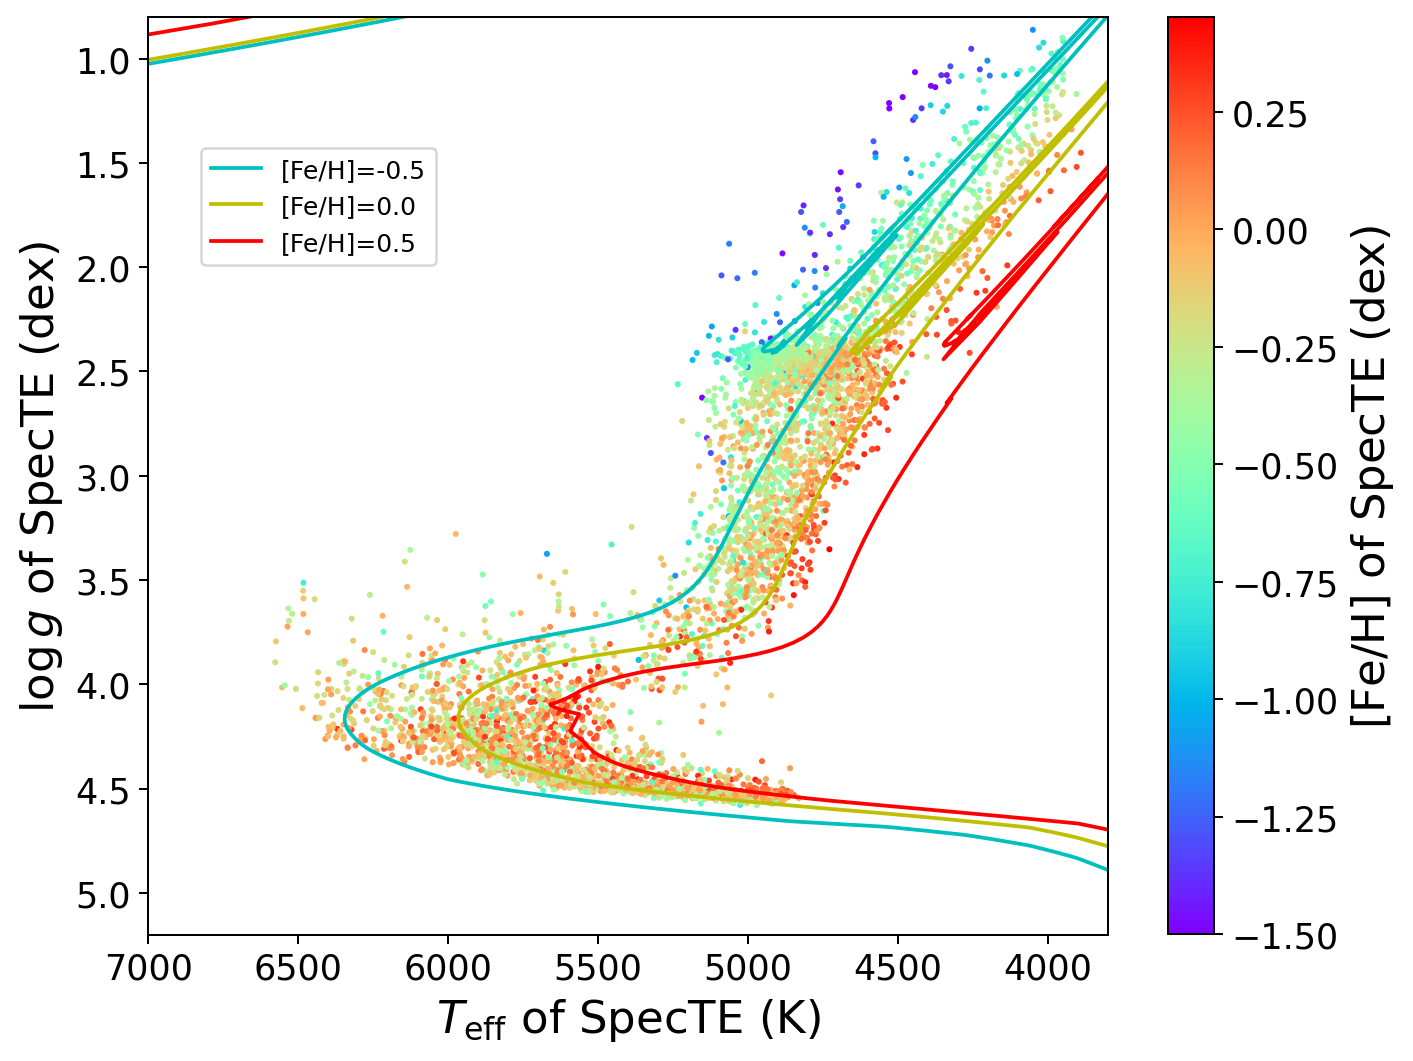

In [7]:
fig = plt.figure(figsize=(8,6),dpi=180)
show_interval = 5

teff = SpecTE_catalog['Teff[K]_predict'].values[::show_interval]
logg = SpecTE_catalog['Logg_predict'].values[::show_interval]
feh = SpecTE_catalog['FeH_predict'].values[::show_interval]

feh[feh > 0.5] = 0.5
feh[feh < -1.5] = -1.5

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.scatter(teff, 
            logg, 
            c=feh, s=2, cmap="rainbow")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14) 
cb.set_label('$\mathrm{[Fe/H]}$ of SpecTE (dex)', fontsize=18)
plt.ylim([5.2,0.8])
plt.xlim([7000,3800])
# plt.clim([-1,0.5])
plt.xlabel('$T_{\mathrm{eff}}$ of SpecTE (K)', fontsize=18)
plt.ylabel('$\log g$ of SpecTE (dex)', fontsize=18)
plt.grid(False) 

plt.plot(10 ** MIST_data['teff_-0.5'], MIST_data['logg_-0.5'], label='[Fe/H]=-0.5', c='c')
plt.plot(10 ** MIST_data['teff_0'], MIST_data['logg_0'], label='[Fe/H]=0.0', c='y')
plt.plot(10 ** MIST_data['teff_0.5'], MIST_data['logg_0.5'], label='[Fe/H]=0.5', c='r')
# plt.legend(loc='center left')
plt.legend(loc=(0.055,0.73))

plt.tight_layout()
# plt.savefig('../images/RRNet_LAMOST_pred_all.pdf')
plt.savefig('./SpecTE_test_logg_FeH.png')
plt.show()